### **動機介紹**

行人流量和動態分析是城市規劃的關鍵數據，能夠幫助政府部門了解人群動向。

了解人群動向對於保障行人安全、維護交通秩序具有實質性的幫助，不但能及時發現異常行為，也能進一步增進行人體驗。

因此我們希望透過影像辨識結合軌跡追蹤，動態了解行人流量和軌跡，為政府部門提供有效的資訊，增強緊急應變能力。


### **MOT17資料集來源**

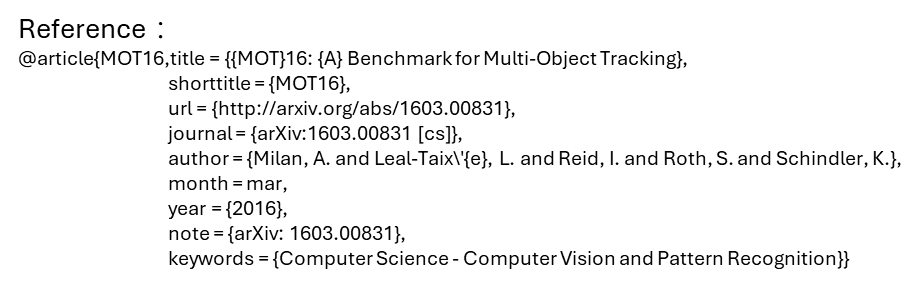

### **資料處理**

[YOLOV8_PREPARE_TRAIN_DATA_.ipynb
](https://github.com/s11007/YOLO_Code_for_Final_Presentation/blob/main/YOLOV8_PREPARE_TRAIN_DATA_.ipynb)

這是我們的資料處理,先將檔案下載至雲端,接著我們將標註資料轉換為YOLO可訓練的labels

### **模型訓練**

[**YOLOV8_TRAIN.ipynb**](https://github.com/s11007/YOLO_Code_for_Final_Presentation/blob/main/YOLOV8_TRAIN.ipynb)

這是v8的模型訓練

首先建立yaml檔,接著載入預訓練模型(YOLOv8n)# 因colab運算元有限,且希望能做到real-time,因此只用最小模型。

自訂義模型使用MOT17訓練集訓練模型


### **資料測試**

[**YOLOV8_TRACKING.ipynb**](https://github.com/s11007/YOLO_Code_for_Final_Presentation/blob/main/YOLOV8_TRACKING.ipynb)
這是我們的資料測試,裡面包含處裡測試影片、測試與測試結果匯出

處裡測試影片
原始影片檔案太大,直接跑追蹤會讓colab的RAM過載,因此先將影片每五幀截取一張壓成影片,再進行預測

資料測試部分程式改寫自yolov8官網程式碼另外結合了cv2套件的影片存取功能。
首先使用cap擷取測試影片,接著對每幀讀取圖片,取得結果後把box疊到圖片上,在疊上box後,記錄追蹤並劃出軌跡,最後寫入影片


### **輸出結果**

[影片](https://vimeo.com/951678578)

### **Real-Time輸出**

**[YOLOv8_REAL_TIME_TRACKING.ipynb](https://github.com/s11007/YOLO_Code_for_Final_Presentation/blob/main/YOLOv8_REAL_TIME_TRACKING.ipynb)**

Real-Time輸出跟v8 tracking 做的差不多,把原先cap 擷取影片改為用 cap 擷取即時影像資訊，但因為大部分時間不會偵測到人，要多加判斷式確認，如果沒偵測到就顯示原畫面，不然會出現錯誤


### **主要改進方向**

當進行追蹤時,若物體被障礙物阻擋,ID會重新計算,導致現階段做檢驗時會出現同一個人有不同ID。

**改進方式:**

利用ReID模型改善

**ReID想法:**

因為人不會憑空由路中央冒出或消失，只會發生於特定區域，例如：畫面邊界與商店門口等。

因此當ID於不正常位置消失時,可以判斷為人停留於畫面中但無法識別。

另外能利用移動速度推測這個ID將於畫面中停留的時長,若於不正常時間點消失,也能判斷他大機率停留於畫面中但無法識別。

**ReID可能的作法:**

從第二幀(或更後面)開始

1.與前一幀比對,確認ID消失與出現的位置,如果在不正常位置發生,紀錄ID,標註為不正常消失或出現。

2.可以利用移動速度,推測這個ID將於畫面中停留的時長,若於不正常時間點消失,紀錄ID ，標註為不正常消失。

當有不正常出現ID,尋找前幾幀不正常消失ID,並利用軌跡預測結合ID間最小距離的方法,重新把ID還回去,並將其軌跡連接。


1和2間的不正常消失也可以互相比對,推斷可能出現位置,將其軌跡連接。

利用這些方法能有效改善ID重置問題。

不過多跑一個模型對電腦效能與預測時長有所影響，還要額外進行評估。

